<a href="https://colab.research.google.com/github/PaisleyZuo/Credit-Score-Classification/blob/main/Credit_score_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats.contingency import chi2_contingency
from sklearn.feature_selection import chi2, SelectKBest, f_classif
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',10)

**2. Data Cleaning**

In [3]:
df = pd.read_csv('train.csv')
print('The size of the train dataset is',{df.shape})

The size of the train dataset is {(100000, 28)}


In [4]:
df.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.11542024292334,Low_spent_Small_value_payments,444.8670318506144,Good
13,0x1613,CUS_0x21b1,June,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190144355745,High_spent_Large_value_payments,481.505261949182,Good


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
unique_features = ['ID','Customer_ID','Name','SSN']

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Check Duplicate Value

In [8]:
print(df.duplicated().sum())
print(df['ID'].duplicated().sum())

0
0


Handling missing value & abnormal value

In [9]:
for col in df.columns:
  print(df[col].value_counts(dropna=False))
  print('\n')

ID
0x25fd5    1
0x25fd4    1
0x25fd3    1
0x25fd2    1
0x25fd1    1
          ..
0x1606     1
0x1605     1
0x1604     1
0x1603     1
0x1602     1
Name: count, Length: 100000, dtype: int64


Customer_ID
CUS_0x942c    8
CUS_0xd40     8
CUS_0x21b1    8
CUS_0x2dbc    8
CUS_0x1d18    8
             ..
CUS_0x4157    8
CUS_0x5407    8
CUS_0x284a    8
CUS_0x95ee    8
CUS_0x1cdb    8
Name: count, Length: 12500, dtype: int64


Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64


Name
NaN               9985
Stevex              44
Langep              44
Jessicad            39
Vaughanl            39
                  ... 
Janeman Latulf       4
Lucye                4
Alina Selyukhg       4
Samuel Shenf         4
Timothyl             3
Name: count, Length: 10140, dtype: int64


Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
6618       1
3155 

Now, we build some functions that we can use later.

Function 1: fill null value by forward fill and backward fill

In [10]:
# First fucntion
def fill_nan_value(data, col, col_ref):
  # First forward fill within each ID group
  df[col] = df.groupby(df[col_ref])[col].transform(lambda x: x.fillna(method='ffill'))
  # Then backward fill to catch any remaining NaNs at the beginning of groups
  df[col] = df.groupby(df[col_ref])[col].transform(lambda x: x.fillna(method='bfill'))
  return df

# features_for_first_approach = ['Name', 'Monthly_Inhand_Salary','Num_Credit_Inquiries']

Funciton 2: to replace out_of_range values with NaN, and forward and backward fill

In [11]:
# Second function
def replace_outofrange_num(data, col, col_ref, a1, a2):
  # Replace out-of-range values with NaN
  data[col] = pd.to_numeric(data[col], errors='coerce')
  data[col] = data[col].apply(lambda x: np.nan if pd.notnull(x) and (x < a1 or x > a2) else x)
  data = fill_nan_value(df, col,col_ref)
  return data

# features_for_second_approach = ['Age','Num_of_Loan','Num_Bank_Accounts','Num_Credit_Card']

Function 3: to replace non-numerical value into NaN, and forward and backward fill

In [12]:
# Third function
def replace_abnormal_num(data,col,col_ref):
  data[col] = pd.to_numeric(data[col], errors='coerce')
  data = fill_nan_value(df, col, col_ref)
  return data

# features_for_second_approach_simplied = ['Annual_Income','Outstanding_Debt','Changed_Credit_Limit']

Function 4: to replace the out_of_range string into NaN, and forward and backward fill

In [13]:
# Fourth function
def replace_abnormal_string(data, col, col_ref, replace_term):
  data[col] = data[col].replace(replace_term, np.nan)
  data = fill_nan_value(df, col, col_ref)
  return data

# features_for_third_approach = ['SSN','Occupation']

Function 5: have a look of each feature. Plot kde, boxplot, mean, variance, and skewness.

In [14]:
def plot_basic_stat(df_column, log = False):

  print(f"Mean: {np.mean(df_column)}")
  print(f"Variance: {np.var(df_column)}")
  print(f"Skewness: {df_column.skew()}")

  if log == False:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(df_column)
    plt.title('KDE Plot')

    plt.subplot(1, 2, 2)
    sns.boxplot(df_column)
    plt.title('Box Plot')

    plt.tight_layout()
    plt.show()

  if log == True:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(np.log1p(df_column))
    plt.title('KDE Plot')

    plt.subplot(1, 2, 2)
    sns.boxplot(np.log1p(df_column))
    plt.title('Box Plot')

    plt.tight_layout()
    plt.show()


Function 6(optional): add transformation to see whether the performance will be better or not.

Function 7: check the count of each feature grouped by customer.

In [15]:
def check_count_8(feature):
  print((df.groupby('Customer_ID')[feature].count() == 8).all())

Now we handle features one by one.

ID

In [16]:
df['ID'].duplicated().sum()  # All id's are unique?

np.int64(0)

Customer_ID

In [17]:
check_count_8('Customer_ID')

True


Month

In [18]:
check_count_8('Month')
# Are all the month values equal to each other for each Customer id?
filtered_df = df.groupby('Customer_ID')['Month'].unique()

filtered_df.apply(lambda x: set(x) == set(filtered_df.iloc[0])).all()

True


np.True_

Name

In [19]:
df = fill_nan_value(df, 'Name','Customer_ID')
# print(df['Name'].value_counts(dropna=False))

In [20]:
check_count_8('Name')

True


Age

In [21]:
df = replace_outofrange_num(df,'Age','Customer_ID', 0, 120)
# age_counts = df['Age'].value_counts(dropna=False)
# print(age_counts.sort_index())

In [22]:
# pd.reset_option('display.max_rows', None)
df['Age'].value_counts().sort_index()

,count
Age,
14.0,1224
15.0,1612
16.0,1489
17.0,1554
18.0,2445
...,...
109.0,1
111.0,1
112.0,1


In [23]:
df = replace_outofrange_num(df,'Age','Customer_ID', 13, 57)

In [24]:
# pd.reset_option('display.max_rows', None)
df['Age'].value_counts().sort_index()

,count
Age,
14.0,1224
15.0,1612
16.0,1489
17.0,1554
18.0,2445
...,...
52.0,1383
53.0,1398
54.0,1336


Mean: 33.30638
Variance: 115.88707129558398
Skewness: 0.1564175919347082


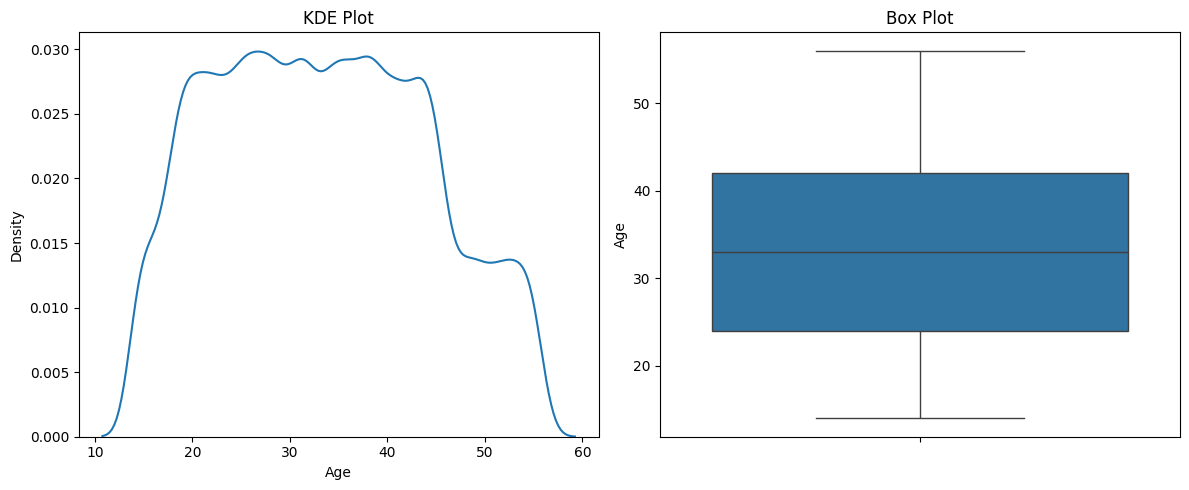

In [25]:
plot_basic_stat(df['Age'])

SSN

In [26]:
df = replace_abnormal_string(df, 'SSN', 'Customer_ID', '#F%$D@*&8')
# print(df['SSN'].value_counts(dropna=False))

In [27]:
check_count_8('SSN')

True


Occupation

In [28]:
# handle occupation
df = replace_abnormal_string(df, 'Occupation', 'Customer_ID', '_______')
# print(df['Occupation'].value_counts(dropna=False))

In [29]:
check_count_8('Occupation')
# Count the number of customers with only one unique occupation
print((df.groupby('Customer_ID')['Occupation'].nunique() == 1).sum())

True
12500


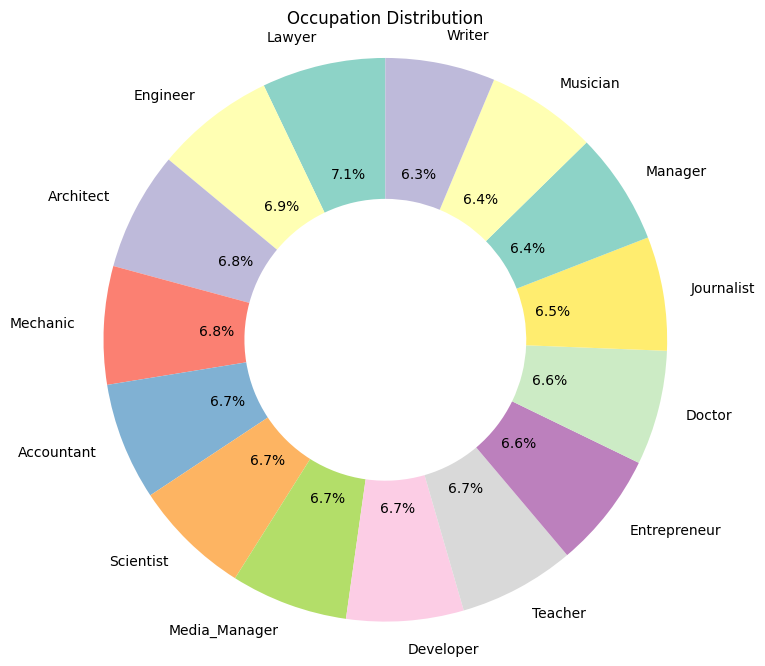

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(df['Occupation'].value_counts(),
        labels=df['Occupation'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors,
        wedgeprops=dict(width=0.5))
plt.title('Occupation Distribution')
plt.axis('equal')
plt.show()

Annual Income

In [31]:
df = replace_abnormal_num(df, 'Annual_Income','Customer_ID')
# Annual_Income_counts = df['Annual_Income'].value_counts(dropna = False)
# print(Annual_Income_counts.sort_index())

In [32]:
df['Annual_Income'].value_counts().sort_index()

,count
Annual_Income,
7.005930e+03,8
7.006035e+03,8
7.006520e+03,8
7.011685e+03,8
7.012310e+03,8
...,...
2.410537e+07,1
2.416001e+07,1
2.417715e+07,1


In [33]:
# We found that there are many outliers, now we set our reasonable range as (0, 180000)
df = replace_outofrange_num(df,'Annual_Income','Customer_ID', 0, 180000)

In [34]:
(df.groupby('Customer_ID')['Annual_Income'].nunique() == 1).sum()

np.int64(12500)

Mean: 50505.12344879999
Variance: 1466831064.1649868
Skewness: 1.130222566741384


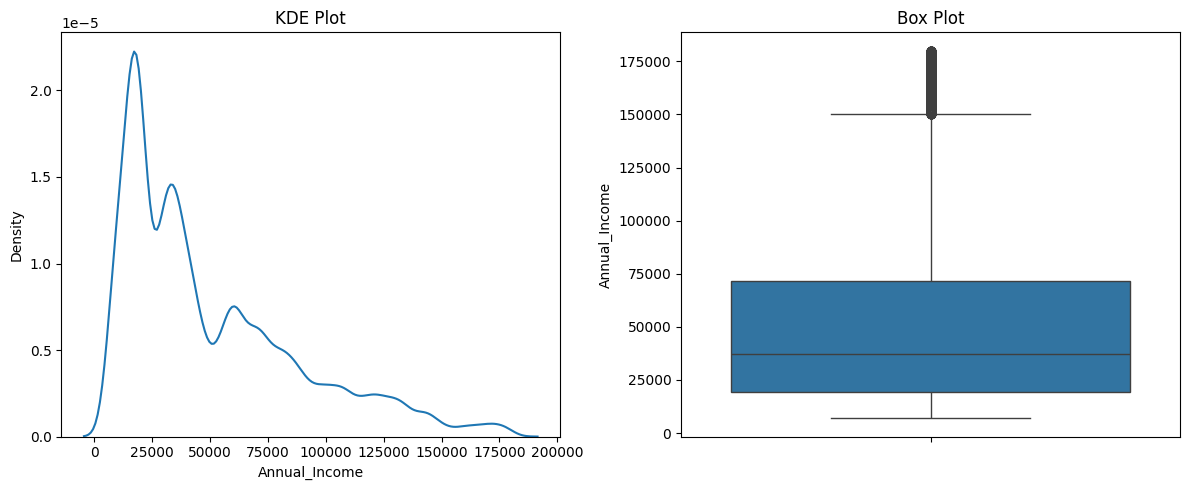

In [35]:
plot_basic_stat(df['Annual_Income'])

In [36]:
# (optional) add transformation/cap outliers/...

Monthly Inhand Salary

In [37]:
df = fill_nan_value(df, 'Monthly_Inhand_Salary','Customer_ID')
# print(df['Monthly_Inhand_Salary'].value_counts(dropna=False))

Mean: 4198.771618939582
Variance: 10160018.658838933
Skewness: 1.1285196566029179


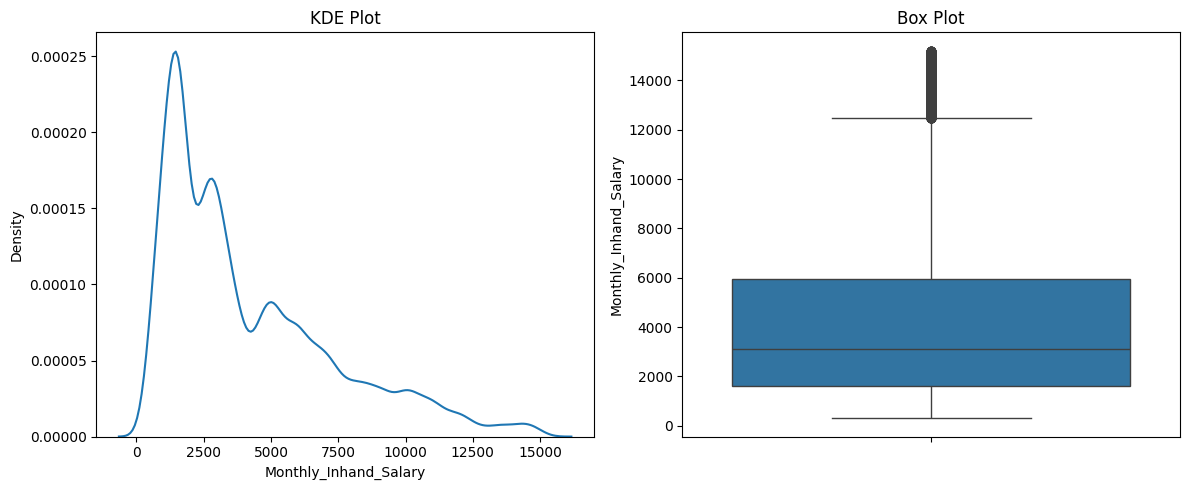

In [38]:
plot_basic_stat(df['Monthly_Inhand_Salary'])

In [39]:
np.corrcoef(df['Monthly_Inhand_Salary'] , df['Annual_Income'])

array([[1.        , 0.99820131],
       [0.99820131, 1.        ]])

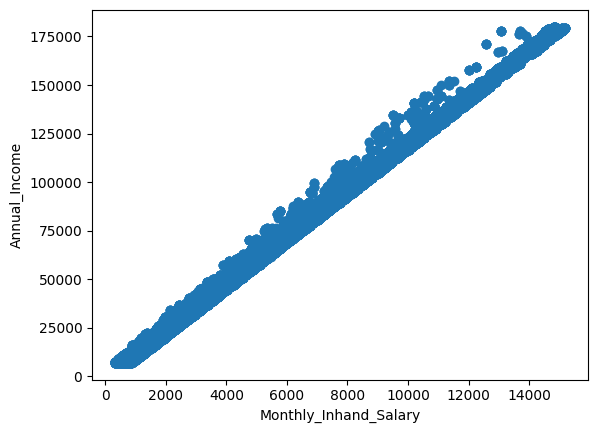

In [40]:
plt.scatter(df['Monthly_Inhand_Salary'] , df['Annual_Income'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Annual_Income')
plt.show()

In [41]:
# create a new feature called "Salary_MaxToMin_Ratio" to determine the volatility of monthly salary
def max_to_min_ratio(salaries):
    return salaries.max() / (salaries.min() + 1e-5)  # add epsilon to avoid div by 0

volatility_df = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(max_to_min_ratio).reset_index()
volatility_df.rename(columns={'Monthly_Inhand_Salary': 'Salary_MaxToMin_Ratio'}, inplace=True)

# Merge with original df
df = df.merge(volatility_df, on='Customer_ID', how='left')

In [42]:
df['Salary_MaxToMin_Ratio'].value_counts().sort_index()

,count
Salary_MaxToMin_Ratio,
1.000000,8
1.000000,8
1.000000,8
1.000000,8
1.000000,8
...,...
1.176718,8
1.178270,8
1.184837,8


In [43]:
check_count_8('Salary_MaxToMin_Ratio')

True


Mean: 1.0049074851125561
Variance: 0.00047549369019711177
Skewness: 4.896024814399585


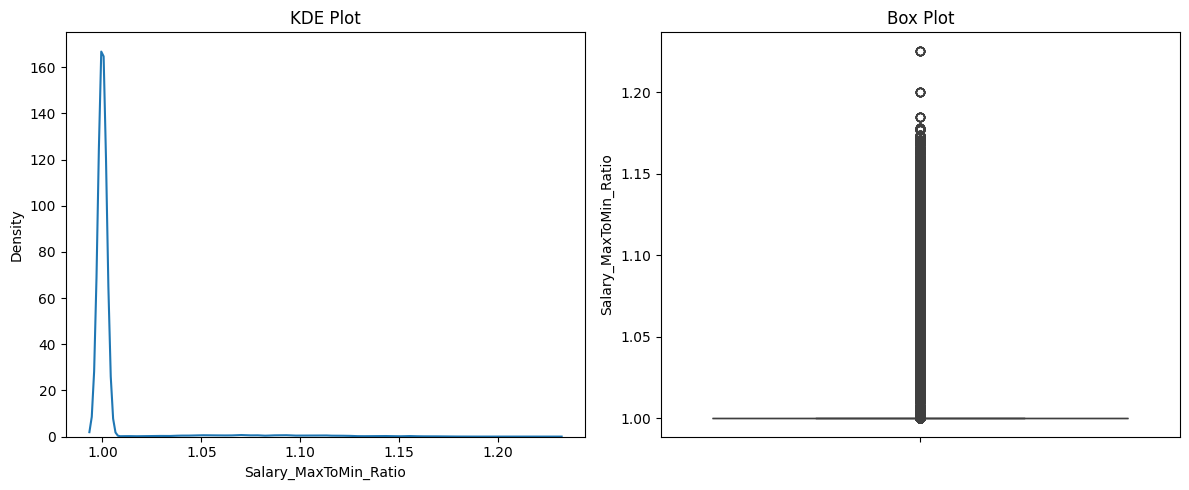

In [44]:
plot_basic_stat(df['Salary_MaxToMin_Ratio'])

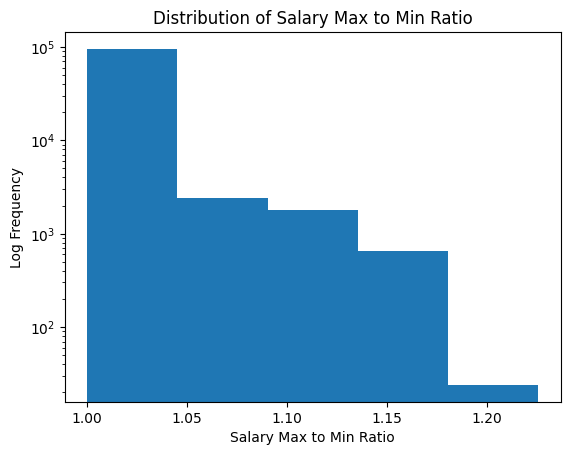

In [45]:
plt.hist(df['Salary_MaxToMin_Ratio'], bins=5, log=True)
plt.xlabel("Salary Max to Min Ratio")
plt.ylabel("Log Frequency")
plt.title("Distribution of Salary Max to Min Ratio")
plt.show()

In [46]:
df = df.drop(columns=['Monthly_Inhand_Salary'])

Num of Bank Accounts

In [47]:
df = replace_outofrange_num(df,'Num_Bank_Accounts','Customer_ID', 0, 15)
# num_BA_counts = df['Num_Bank_Accounts'].value_counts(dropna=False)
# print(num_BA_counts.sort_index())
check_count_8('Num_Bank_Accounts')

True


Mean: 5.3688
Variance: 6.725026559994185
Skewness: -0.1900024437335525


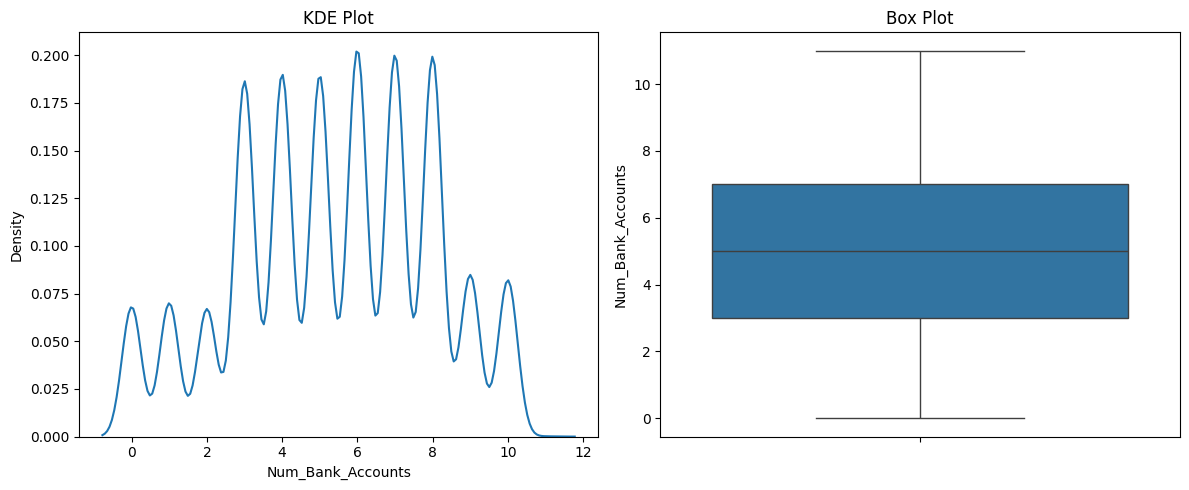

In [48]:
plot_basic_stat(df['Num_Bank_Accounts'])

Num of Credit Card

In [49]:
df = replace_outofrange_num(df,'Num_Credit_Card','Customer_ID', 0, 11)
# num_CC_counts = df['Num_Credit_Card'].value_counts(dropna=False)
# print(num_CC_counts.sort_index())
check_count_8('Num_Credit_Card')

True


In [50]:
df['Num_Credit_Card'].value_counts(dropna = False).sort_index()

,count
Num_Credit_Card,
0.0,14
1.0,2185
2.0,2193
3.0,13565
4.0,14358
...,...
7.0,17029
8.0,5072
9.0,4753


Mean: 5.53364
Variance: 4.272748350398611
Skewness: 0.2257888699467099


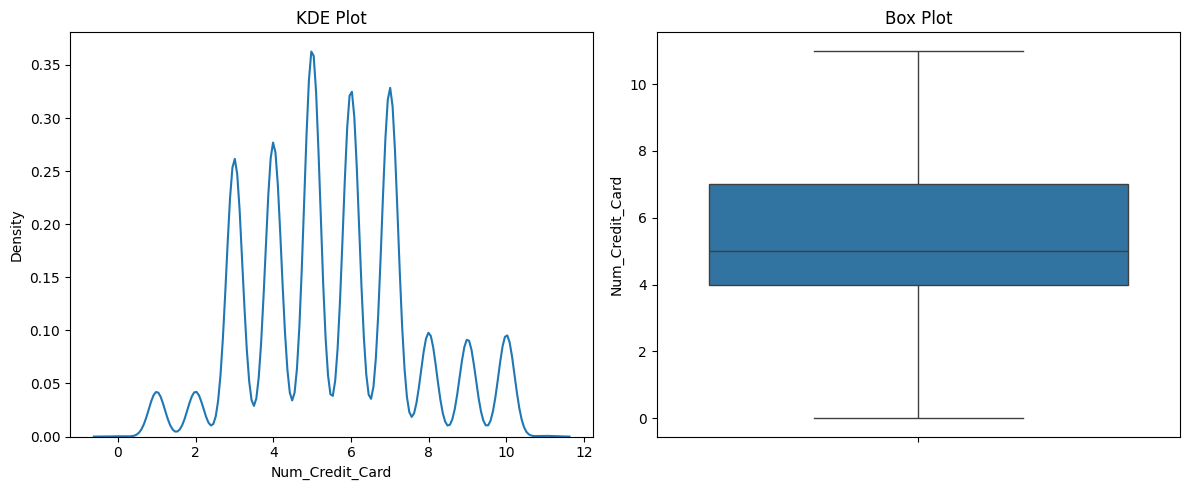

In [51]:
plot_basic_stat(df['Num_Credit_Card'])

Interest Rate

In [52]:
df = replace_outofrange_num(df, 'Interest_Rate','Customer_ID', 0, 50)
# IR_counts = df['Interest_Rate'].value_counts(dropna=False)
# print(IR_counts.sort_index())

Mean: 14.53208
Variance: 76.41009087357476
Skewness: 0.4962318996645298


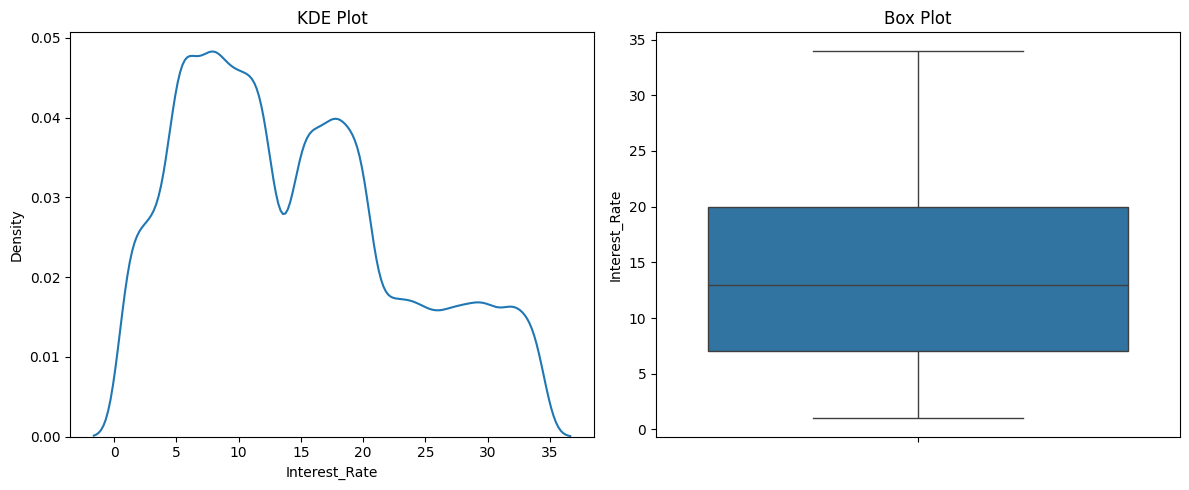

In [53]:
plot_basic_stat(df['Interest_Rate'])

Num of Loan

In [54]:
df = replace_outofrange_num(df,'Num_of_Loan','Customer_ID', 0, 15)
# Loan_counts_counts = df['Num_of_Loan'].value_counts(dropna=False)
# print(age_counts.sort_index())

Mean: 3.53288
Variance: 5.984598905602085
Skewness: 0.44560852324073413


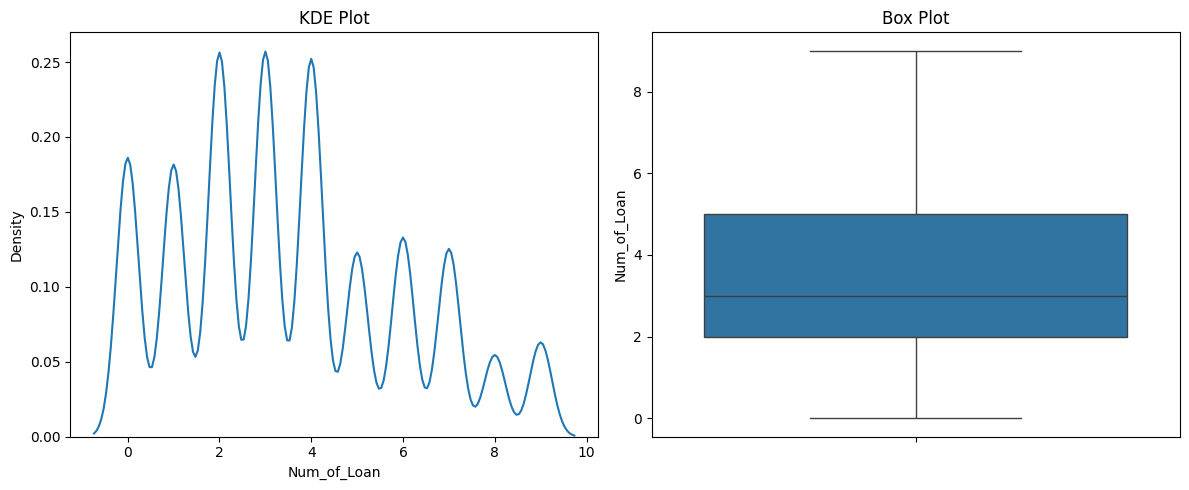

In [55]:
plot_basic_stat(df['Num_of_Loan'])

Types of Loan

In [56]:
# handle types of loan
# Fill missing with empty strings
df['Type_of_Loan'] = df['Type_of_Loan'].fillna('')
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace(" and", "", regex=False)

# Split into list and lowercase everything
df['loan_list'] = df['Type_of_Loan'].apply(
    lambda x: [i.strip().lower() for i in x.split(',')] if x else []
)

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
loan_dummies = pd.DataFrame(
    mlb.fit_transform(df['loan_list']),
    columns=mlb.classes_,
    index=df.index
)

# Add the dummy variables to your original dataframe
df = pd.concat([df, loan_dummies], axis=1)

df = df.drop(columns=['Type_of_Loan', 'loan_list'])

In [57]:
type = ['auto loan', 'credit-builder loan', 'debt consolidation loan', 'home equity loan', 'mortgage loan', 'not specified', 'payday loan', 'personal loan', 'student loan']
new_type = []
for col in type:
  new_col = col.strip().replace(" ", "_").replace("-", "_")
  df[new_col] = df[col].astype(str).str.strip()  # Rename and copy cleaned values
  new_type.append(new_col)
  df = df.drop(columns=[col])
type = new_type

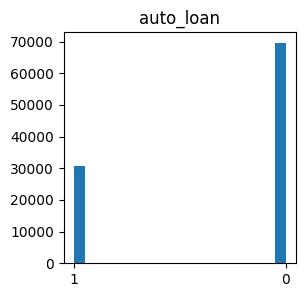

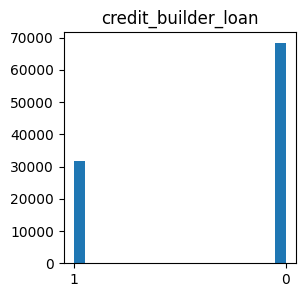

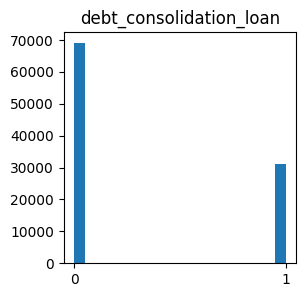

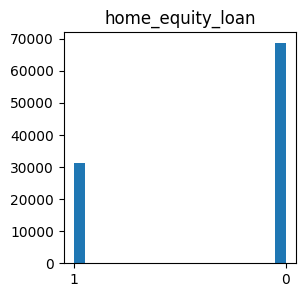

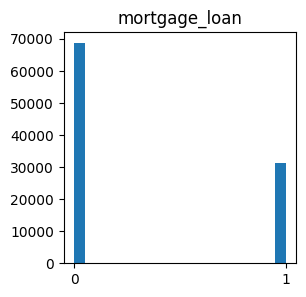

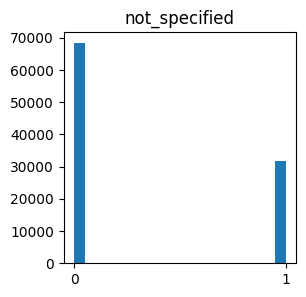

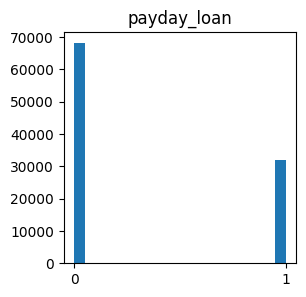

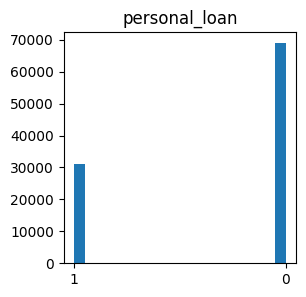

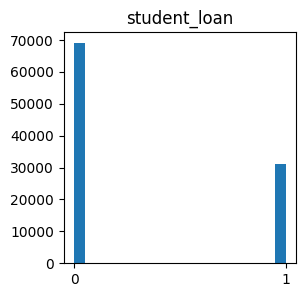

In [58]:
for feature in type:
  plt.figure(figsize=(3, 3))
  plt.hist(df[feature], bins=20)
  plt.title(feature)
  plt.show()

Num of Delayed Payment

In [59]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.strip("_")
df = replace_abnormal_num(df, 'Num_of_Delayed_Payment', 'Customer_ID') # change from object to integer

In [60]:
df['Num_of_Delayed_Payment'].value_counts(dropna = False).sort_index()

,count
Num_of_Delayed_Payment,
-3.0,99
-2.0,254
-1.0,335
0.0,1735
1.0,1773
...,...
4344.0,1
4360.0,1
4384.0,1


In [61]:
# By observation of the value counts, we set the reasonable range is [0,28]
df = replace_outofrange_num(df,'Num_of_Delayed_Payment','Customer_ID', 0, 28)

In [62]:
print(df['Num_of_Delayed_Payment'].value_counts(dropna = False).sort_index())
check_count_8('Num_of_Delayed_Payment')

Num_of_Delayed_Payment
0.0     2012
1.0     2008
2.0     2102
3.0     2129
4.0     2012
        ... 
24.0    1822
25.0    1809
26.0     350
27.0     270
28.0     143
Name: count, Length: 29, dtype: int64
True


Mean: 13.33405
Variance: 39.33018059749896
Skewness: -0.18366200592830706


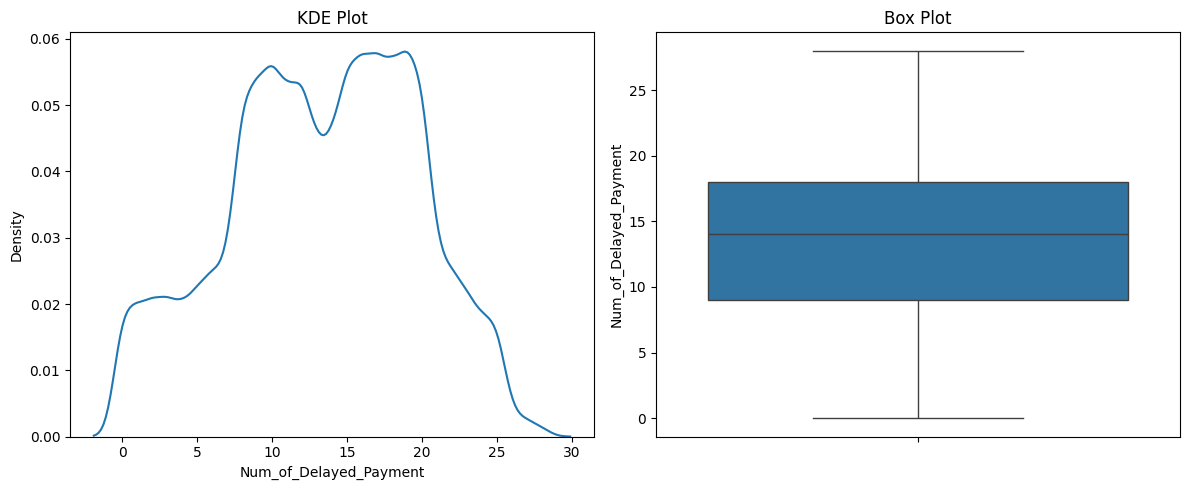

In [63]:
plot_basic_stat(df['Num_of_Delayed_Payment'])

Changed Credit Limit

In [64]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].round(2)
df = replace_abnormal_num(df, 'Changed_Credit_Limit', 'Customer_ID')

In [119]:
df['Changed_Credit_Limit'].value_counts(dropna = False).sort_index()

,count
Changed_Credit_Limit,
-6.49,1
-6.48,1
-6.45,1
-6.44,2
-6.43,2
...,...
35.98,1
36.09,1
36.29,1


Mean: 10.3893032
Variance: 46.10070248246964
Skewness: 0.6411773795076211


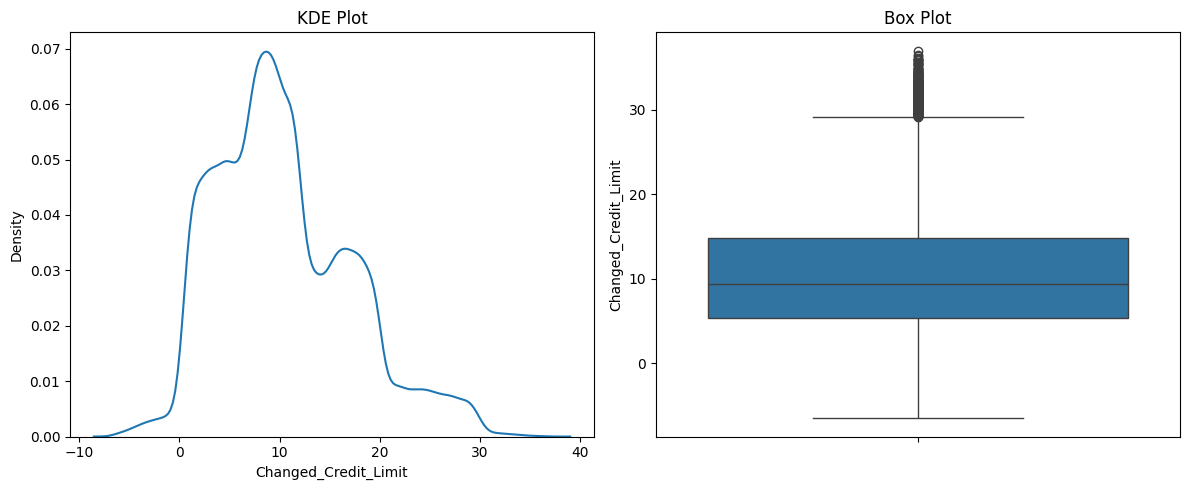

In [66]:
plot_basic_stat(df['Changed_Credit_Limit'])

Num Credit Inquiries

In [120]:
df['Num_Credit_Inquiries'].value_counts(dropna = False).sort_index()

,count
Num_Credit_Inquiries,
0.0,7273
1.0,7882
2.0,8387
3.0,9195
4.0,11745
5.0,5886
6.0,8380
7.0,8361
8.0,8130


In [68]:
# The reasonable range is [0,18]
df = replace_outofrange_num(df,'Num_Credit_Inquiries','Customer_ID', 0, 18)

Mean: 5.77282
Variance: 14.908229247598413
Skewness: 0.40782387087417443


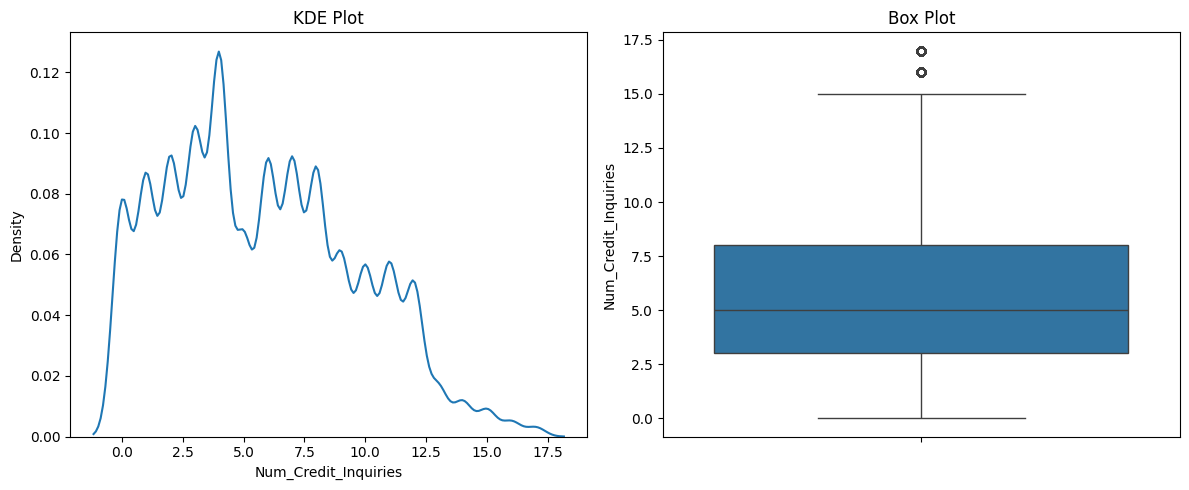

In [69]:
plot_basic_stat(df['Num_Credit_Inquiries'])

Credit Mix

In [70]:
df = replace_abnormal_string(df, 'Credit_Mix', 'Customer_ID', '_')

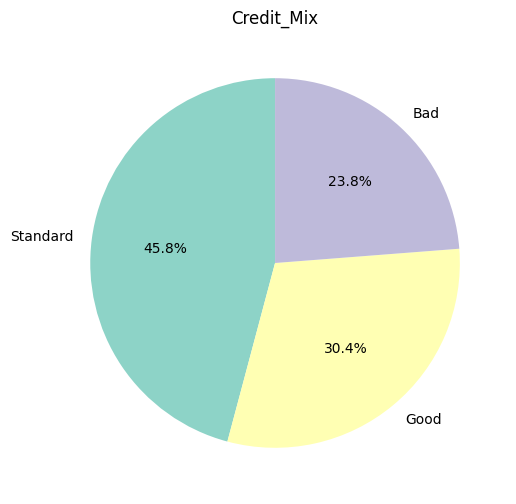

In [71]:
plt.figure(figsize=(6, 6))
plt.pie(df['Credit_Mix'].value_counts(),
        labels=df['Credit_Mix'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('Credit_Mix')
plt.show()

Outstanding Debt

In [72]:
df = replace_abnormal_num(df, 'Outstanding_Debt','Customer_ID')
# Outstanding_Debt_counts = df['Outstanding_Debt'].value_counts(dropna = False)
# print(Outstanding_Debt_counts.sort_index())

In [73]:
check_count_8('Outstanding_Debt')

True


Mean: 1426.220376
Variance: 1334309.7228912285
Skewness: 1.2075361955699684


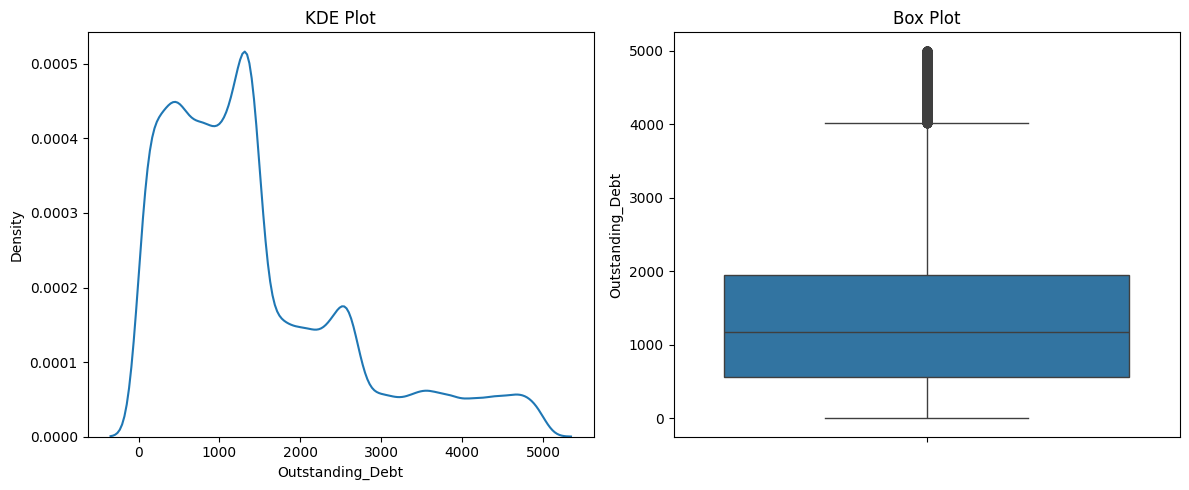

In [74]:
plot_basic_stat(df['Outstanding_Debt'])

Credit_Utilization_Ratio

Mean: 32.2851725189436
Variance: 26.182148659426964
Skewness: 0.028616526134970333


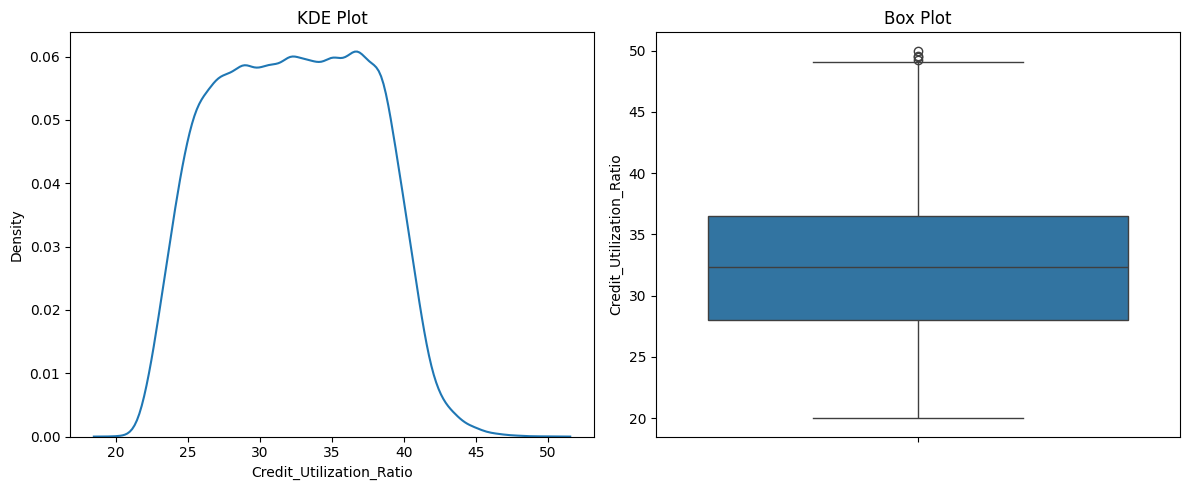

In [75]:
plot_basic_stat(df['Credit_Utilization_Ratio'])

Credit history age

In [76]:
df['Credit_History_Age'] = df['Credit_History_Age'].replace('NA', np.nan)
def convert_age_to_months(age_str):
    if pd.isnull(age_str):
        return np.nan
    years = int(age_str.split(' Years')[0])
    months = int(age_str.split('and ')[-1].split(' Months')[0])
    return years * 12 + months

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_age_to_months)

df = df.drop(columns=['Credit_History_Age'])

In [77]:
def fill_nan_add_1(df, col):
    # First loop: Fill NaN values with the previous value + 1
    for i in range(len(df)):
        if pd.isna(df.loc[df.index[i], col]):
            # Get the previous value
            if i > 0:
                df.loc[df.index[i], col] = (
                    df.loc[df.index[i - 1], col] + 1
                )
            else:
                df.loc[df.index[i], col] = np.nan

    # Second loop: Fill NaN values by looking forward (backward fill)
    for i in range(len(df) - 1, -1, -1):
        if pd.isna(df.loc[df.index[i], col]):
            if i < len(df) - 1:
                df.loc[df.index[i], col] = (
                    df.loc[df.index[i + 1], col] - 1
                )

    return df

In [78]:
df['Credit_History_Age_Months'] = fill_nan_add_1(df, 'Credit_History_Age_Months')['Credit_History_Age_Months']

In [79]:
df['Credit_History_Age_Months'].value_counts(dropna=False).sort_index()

,count
Credit_History_Age_Months,
1.0,2
2.0,15
3.0,21
4.0,36
5.0,43
...,...
401.0,99
402.0,61
403.0,17


Mean: 221.30885
Variance: 9939.907181677216
Skewness: -0.04843806552813478


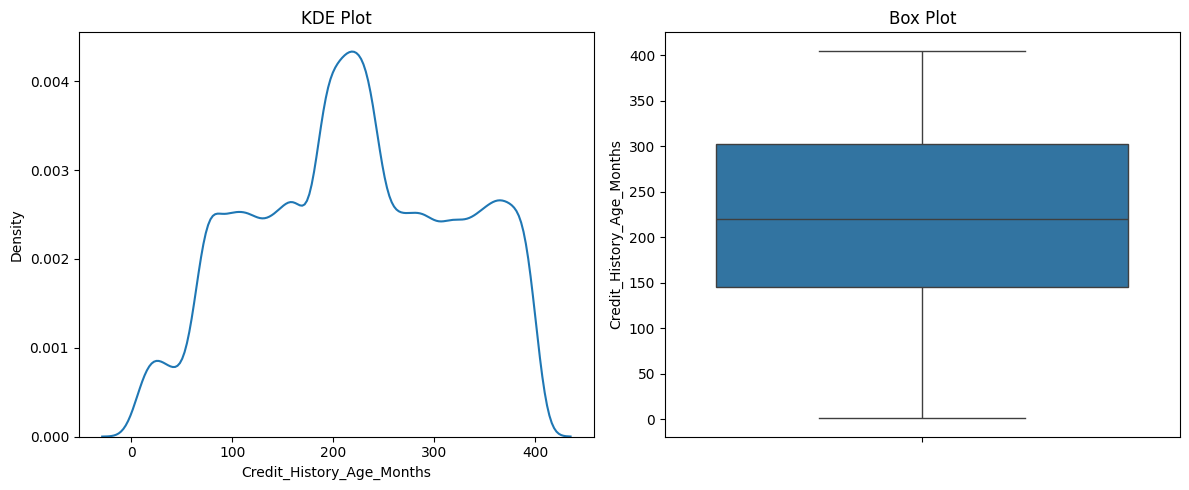

In [80]:
plot_basic_stat(df['Credit_History_Age_Months'])

Payment of Min Amount

In [81]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace('NM', np.nan)
df = fill_nan_value(df, 'Payment_of_Min_Amount','Customer_ID')

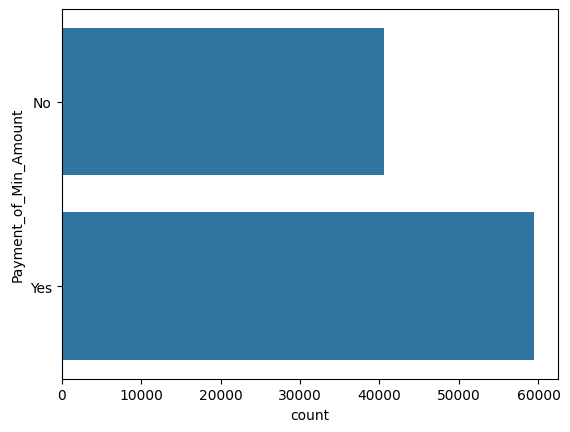

In [82]:
sns.countplot(df['Payment_of_Min_Amount'])
plt.show()

Total EMI per month

In [83]:
df['Total_EMI_per_month'].value_counts(dropna = False).sort_index()

,count
Total_EMI_per_month,
0.000000,10613
4.462837,8
4.713184,8
4.865690,8
4.916139,8
...,...
82193.000000,1
82204.000000,1
82236.000000,1


Mean: 1403.1182166159933
Variance: 68989631.68106474
Skewness: 7.102524490742075


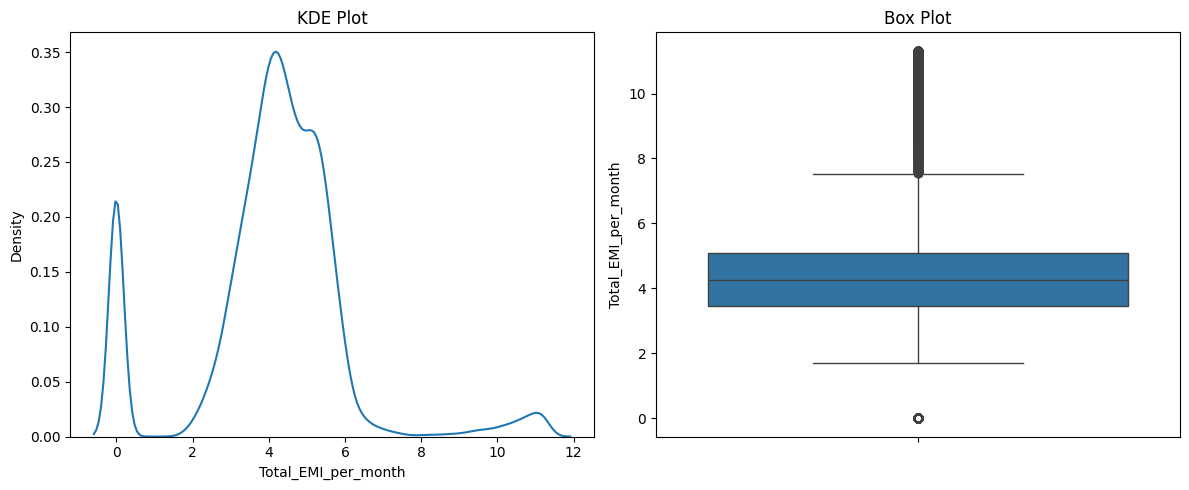

In [84]:
plot_basic_stat(df['Total_EMI_per_month'], log=True)

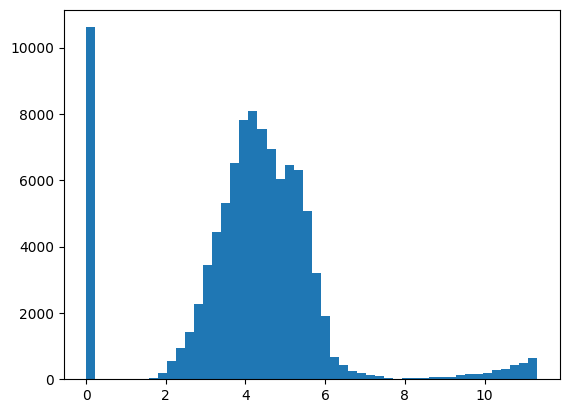

In [85]:
plt.hist(np.log1p(df['Total_EMI_per_month']), bins=50)
plt.show()

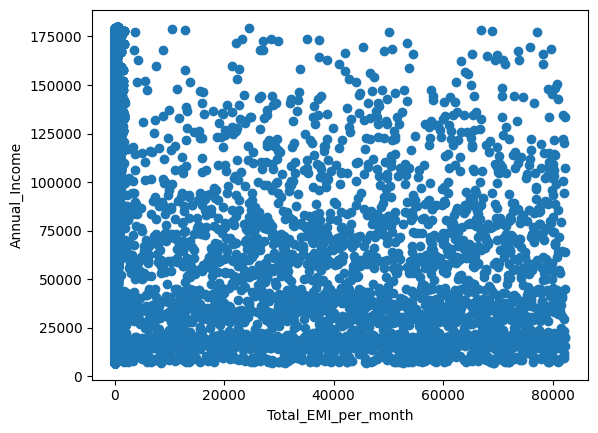

In [86]:
# df['Total_EMI_per_month'] = df['Total_EMI_per_month'].replace
plt.scatter(df['Total_EMI_per_month'],  df['Annual_Income'])
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Annual_Income')
plt.show()

In [87]:
np.corrcoef(df['Total_EMI_per_month'], df['Annual_Income'])

array([[1.        , 0.00832809],
       [0.00832809, 1.        ]])

In [88]:
# create a new feature that combine the annual income and total EMI per month

Amount invested monthly

In [89]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace(0, np.nan)
df = replace_abnormal_num(df, 'Amount_invested_monthly', 'Customer_ID')

In [90]:
df['Amount_invested_monthly'].value_counts(dropna = False).sort_index()

,count
Amount_invested_monthly,
0.000000,182
10.010194,1
10.011425,1
10.036600,1
10.053768,1
...,...
1903.080048,1
1941.237454,1
1944.520747,1


Mean: 195.83357467860066
Variance: 39967.74121626144
Skewness: 2.551474355791602


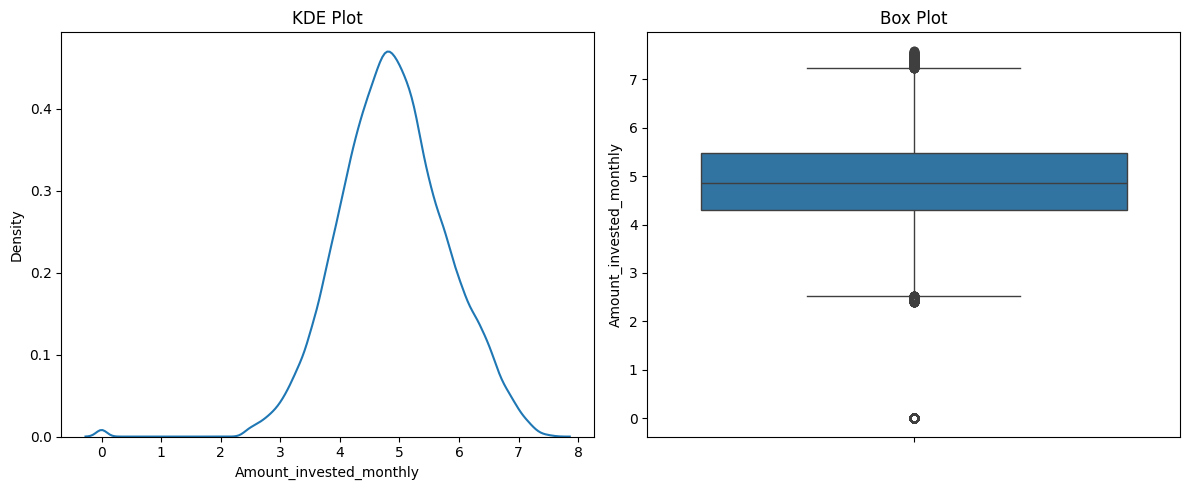

In [91]:
plot_basic_stat(df['Amount_invested_monthly'], log=True)

In [92]:
# add transformation??

Payment Behaviour

In [93]:
df = replace_abnormal_string(df, 'Payment_Behaviour', 'Customer_ID', '!@9#%8')

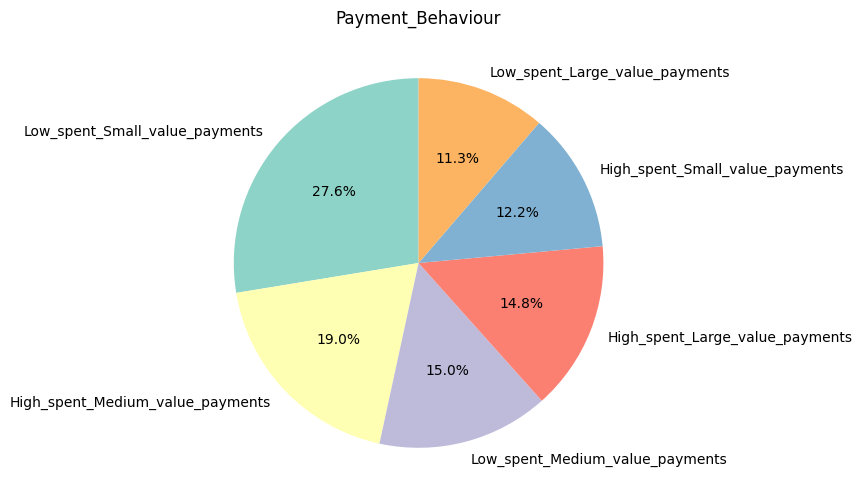

In [94]:
plt.figure(figsize=(6, 6))
plt.pie(df['Payment_Behaviour'].value_counts(),
        labels=df['Payment_Behaviour'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('Payment_Behaviour')
plt.show()

Monthly Balance

In [95]:
df = replace_abnormal_num(df, 'Monthly_Balance','Customer_ID') # change monthly balance into int

Mean: 403.06727306463307
Variance: 46136.972455049756
Skewness: 1.5807411522243873


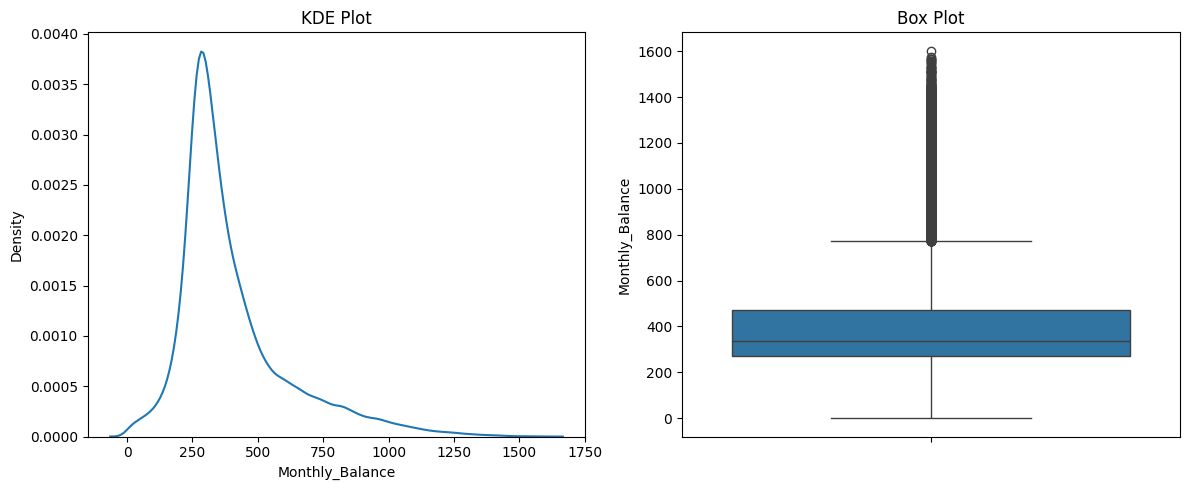

In [96]:
plot_basic_stat(df['Monthly_Balance'])

Credit Score

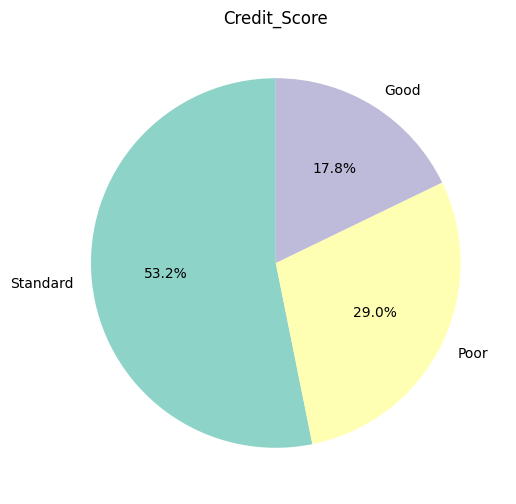

In [97]:
plt.figure(figsize=(6, 6))
plt.pie(df['Credit_Score'].value_counts(),
        labels=df['Credit_Score'].value_counts().index,
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors)
plt.title('Credit_Score')
plt.show()

In [98]:
df['Credit_Score'] = df['Credit_Score'].map({
    "Good": 2,
    "Standard": 1,
    "Poor": 0
}).astype(int)

In [99]:
# Move 'Credit_Score' to the end
credit_score_col = df.pop('Credit_Score')
df['Credit_Score'] = credit_score_col

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  object 
 1   Customer_ID                100000 non-null  object 
 2   Month                      100000 non-null  object 
 3   Name                       100000 non-null  object 
 4   Age                        100000 non-null  float64
 5   SSN                        100000 non-null  object 
 6   Occupation                 100000 non-null  object 
 7   Annual_Income              100000 non-null  float64
 8   Num_Bank_Accounts          100000 non-null  float64
 9   Num_Credit_Card            100000 non-null  float64
 10  Interest_Rate              100000 non-null  float64
 11  Num_of_Loan                100000 non-null  float64
 12  Delay_from_due_date        100000 non-null  int64  
 13  Num_of_Delayed_Payment     100

**3. EDA**

Firstly, let's determine the effect of categorical features on the credit score, and see whether we need to drop some irrelevant features. Obviously, the features including ID, Customer_ID, Name, SSN, are irrelevant, so we directly drop them.

In [101]:
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'])

Then let's see more categorical features: Month, Occupation, several types of loan, credit mix, Payment_of_Min_Amount, and Payment_Behaviour.

Let's define a function creating heatmap between credit score and other features to use later.

In [102]:
def heatmap_credit_score(col,cmap="YlGnBu"):
    ct = pd.crosstab(df[col], df['Credit_Score'], normalize='index') * 100
    plt.figure(figsize=(6, 6))
    sns.heatmap(ct, annot=True, fmt=".1f", cmap=cmap)
    plt.title(f'{col} vs Credit Score Proportional Heatmap')
    plt.xlabel('Credit Score')
    plt.ylabel(col)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

Credit score & Month

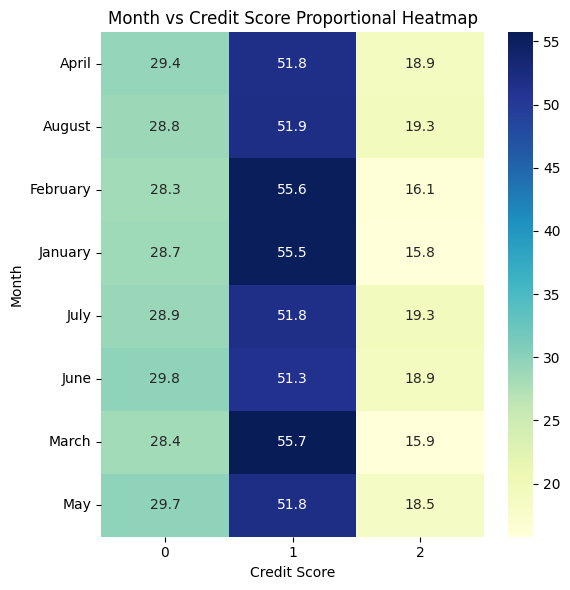

In [103]:
heatmap_credit_score('Month')

Credit score & Occupation

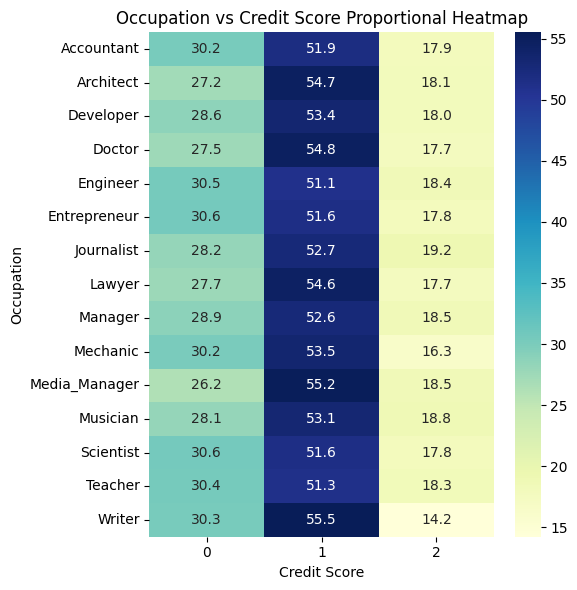

In [104]:
heatmap_credit_score('Occupation')

Loan's types & Credit score

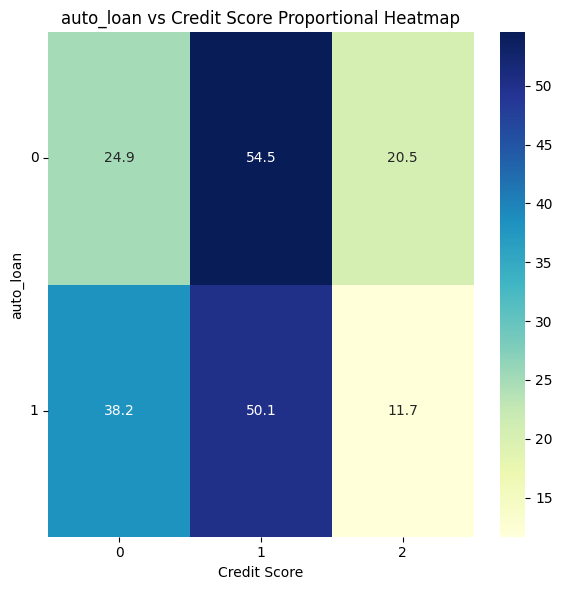

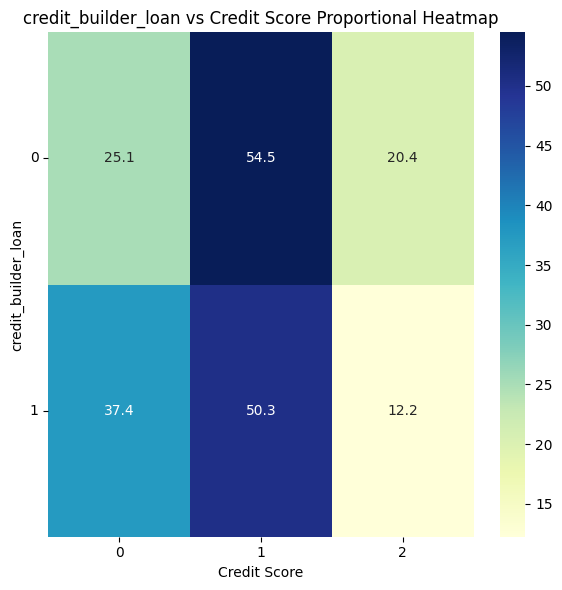

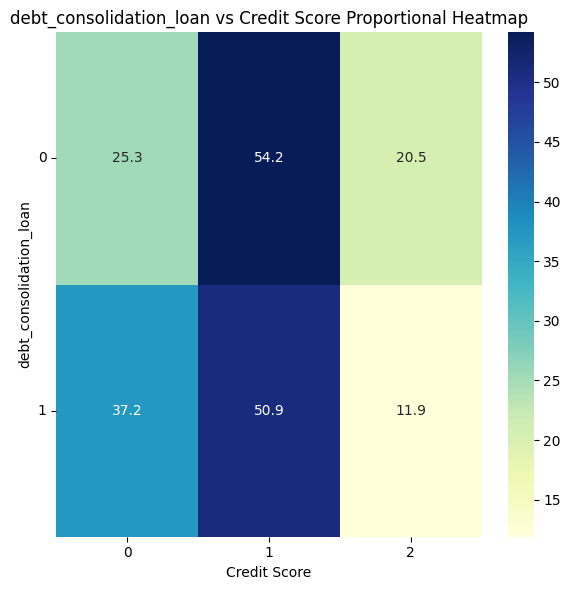

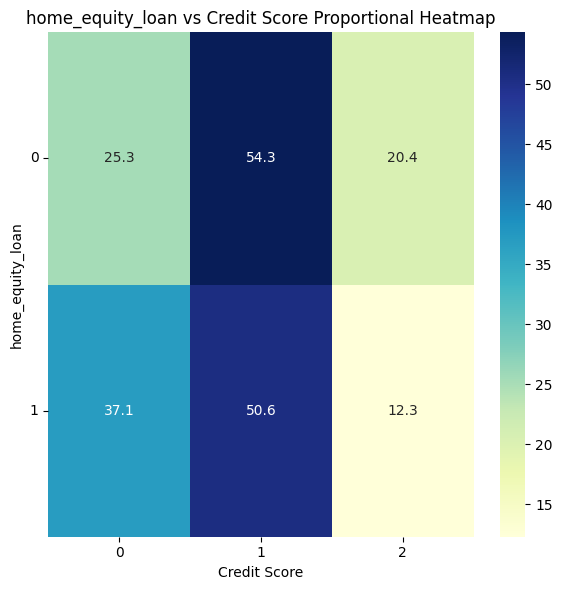

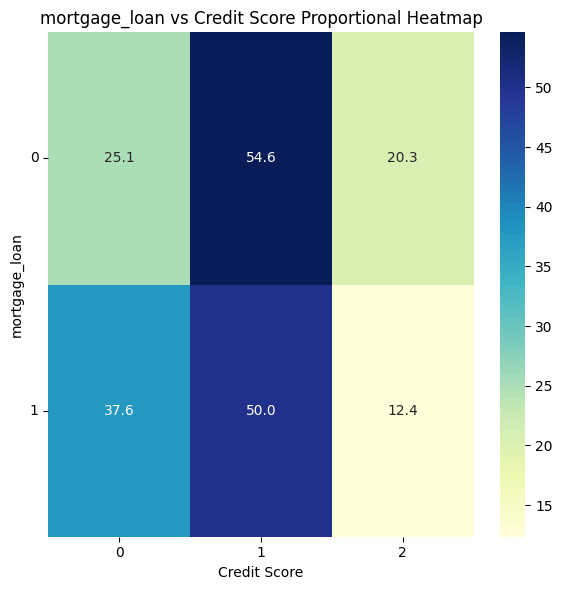

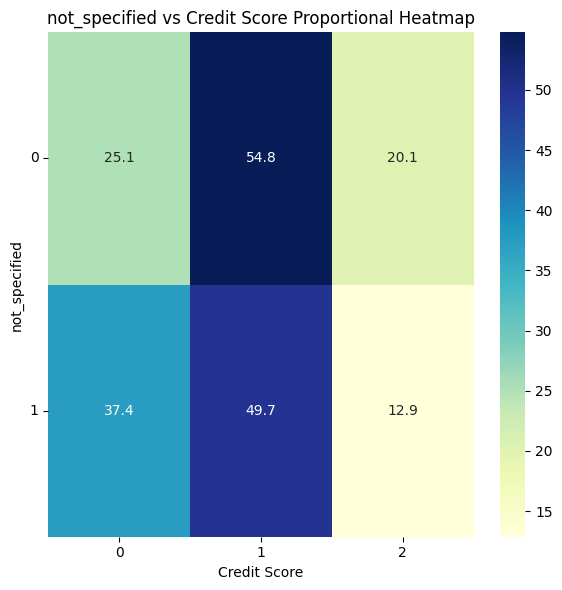

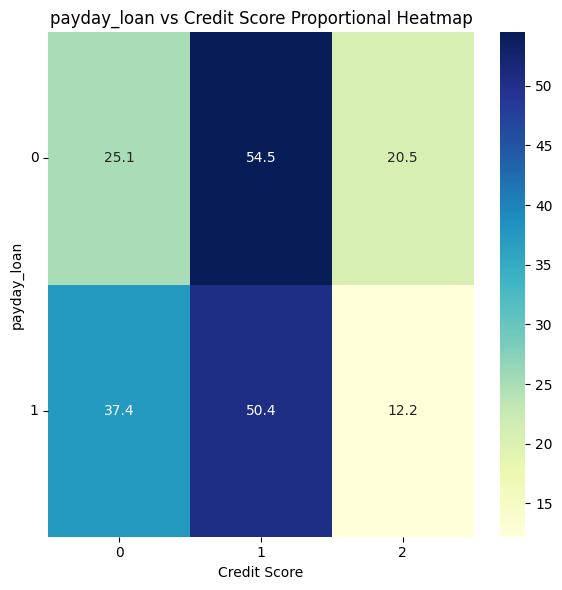

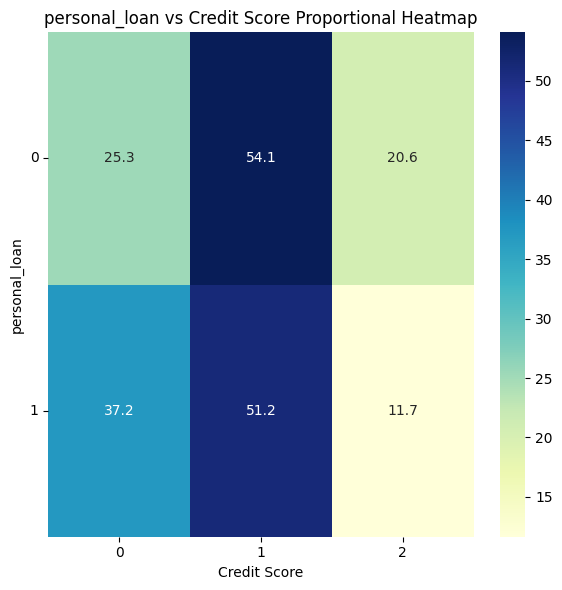

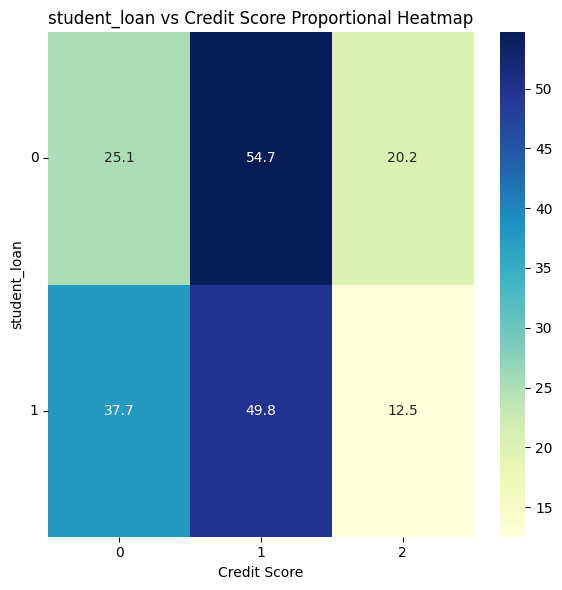

In [105]:
for col in type:
  heatmap_credit_score(col)

Credit Mix & Credit Score

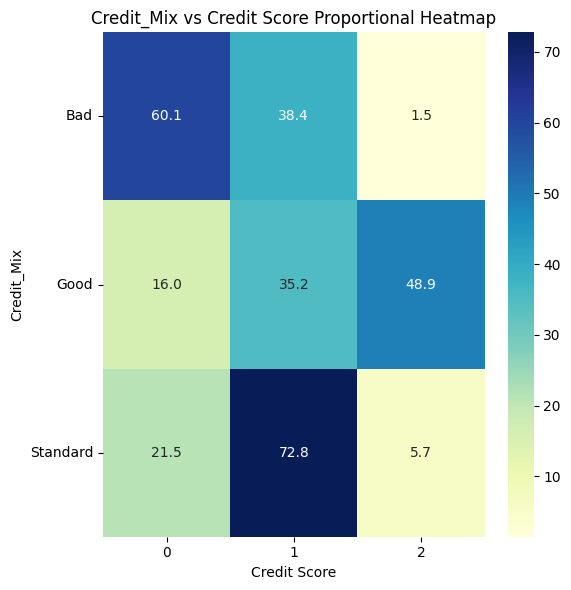

In [106]:
heatmap_credit_score('Credit_Mix')

Payment_of_Min_Amount & Credit Score

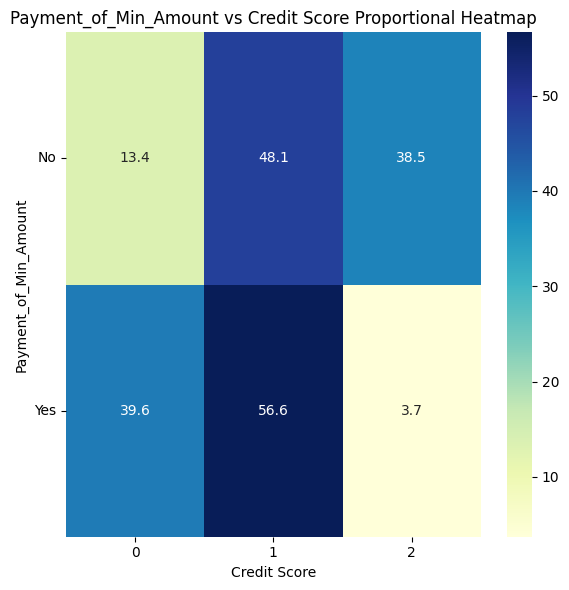

In [107]:
heatmap_credit_score('Payment_of_Min_Amount')

Payment Behavior & Credit Score

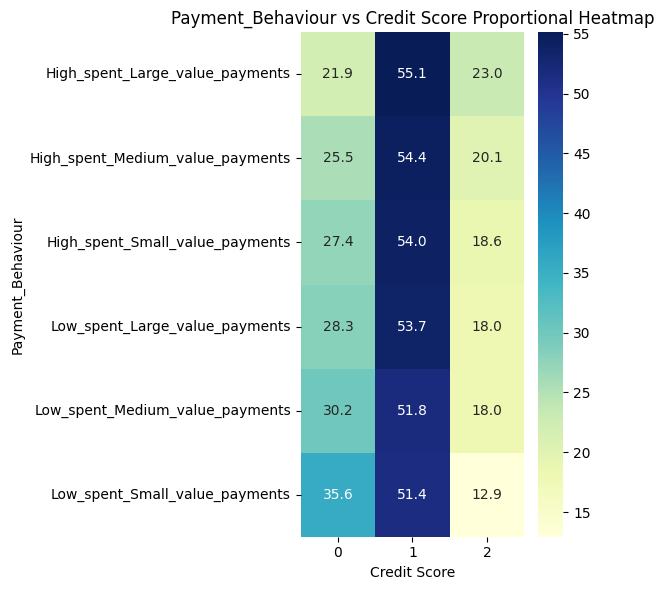

In [108]:
heatmap_credit_score('Payment_Behaviour')

From the plots above, we can see the month and occupation are not very relevant, so we drop them and keep the rest of the features.

In [109]:
df = df.drop(columns=['Month', 'Occupation'])

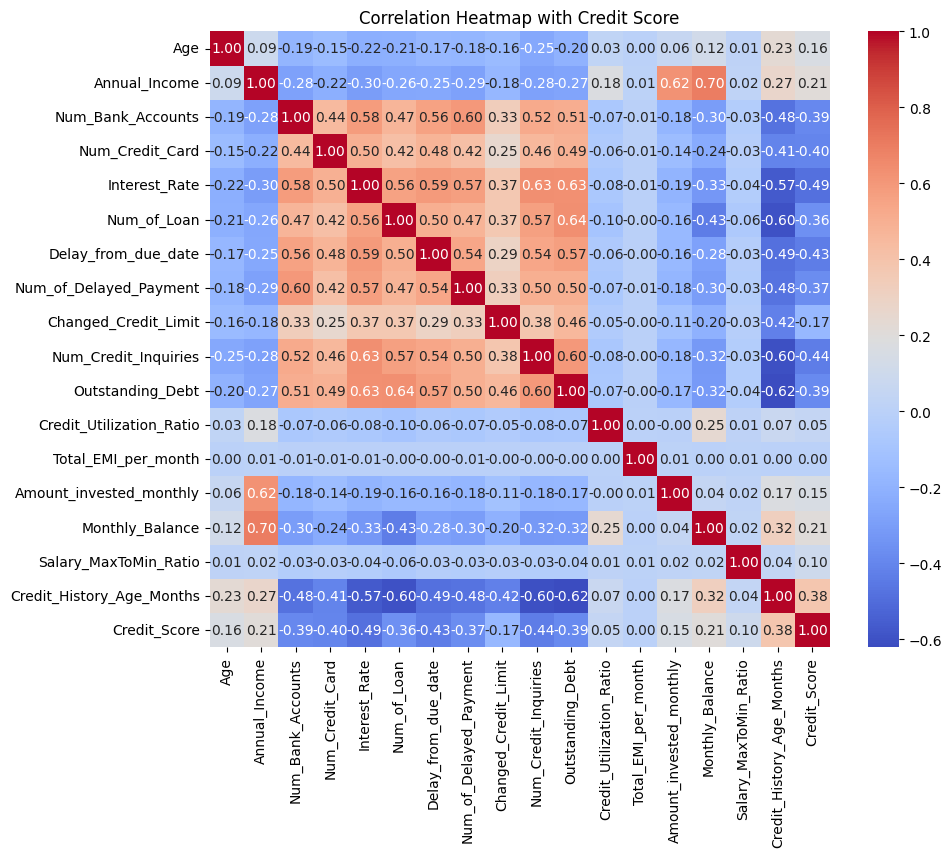

In [110]:
# Select only numeric columns from the DataFrame to compute correlations
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)

plt.title("Correlation Heatmap with Credit Score")

plt.show()

In [111]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_colmns = df.select_dtypes(exclude=np.number).columns.tolist()

In [112]:
'''
# Set the target feature (usually the last column in the DataFrame)
hue_feature = df.columns[-1]

# Get all numerical features except the target column
features = numeric_columns[:-1]

# Define the layout for the subplots
n_cols = 1  # Number of columns for the subplots
n_rows = len(features)  # Number of rows is equal to the number of features

# Create subplots with appropriate size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))
plt.subplots_adjust(hspace=0.5)  # Adjust vertical space between plots

# Plotting histograms with KDE for each feature
for i, feature in enumerate(features):
    sns.histplot(data=df, x=feature, hue=hue_feature, kde=True, ax=axes[i])  # Create the histogram with KDE
    axes[i].set_title(f'Histogram of {feature}')  # Set the title for each subplot

# Adjust layout to prevent overlap of plots
plt.tight_layout()

# Display the plot
plt.show()
'''

"\n# Set the target feature (usually the last column in the DataFrame)\nhue_feature = df.columns[-1]\n\n# Get all numerical features except the target column\nfeatures = numeric_columns[:-1]\n\n# Define the layout for the subplots\nn_cols = 1  # Number of columns for the subplots\nn_rows = len(features)  # Number of rows is equal to the number of features\n\n# Create subplots with appropriate size\nfig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 5))\nplt.subplots_adjust(hspace=0.5)  # Adjust vertical space between plots\n\n# Plotting histograms with KDE for each feature\nfor i, feature in enumerate(features):\n    sns.histplot(data=df, x=feature, hue=hue_feature, kde=True, ax=axes[i])  # Create the histogram with KDE\n    axes[i].set_title(f'Histogram of {feature}')  # Set the title for each subplot\n\n# Adjust layout to prevent overlap of plots\nplt.tight_layout()\n\n# Display the plot\nplt.show()\n"

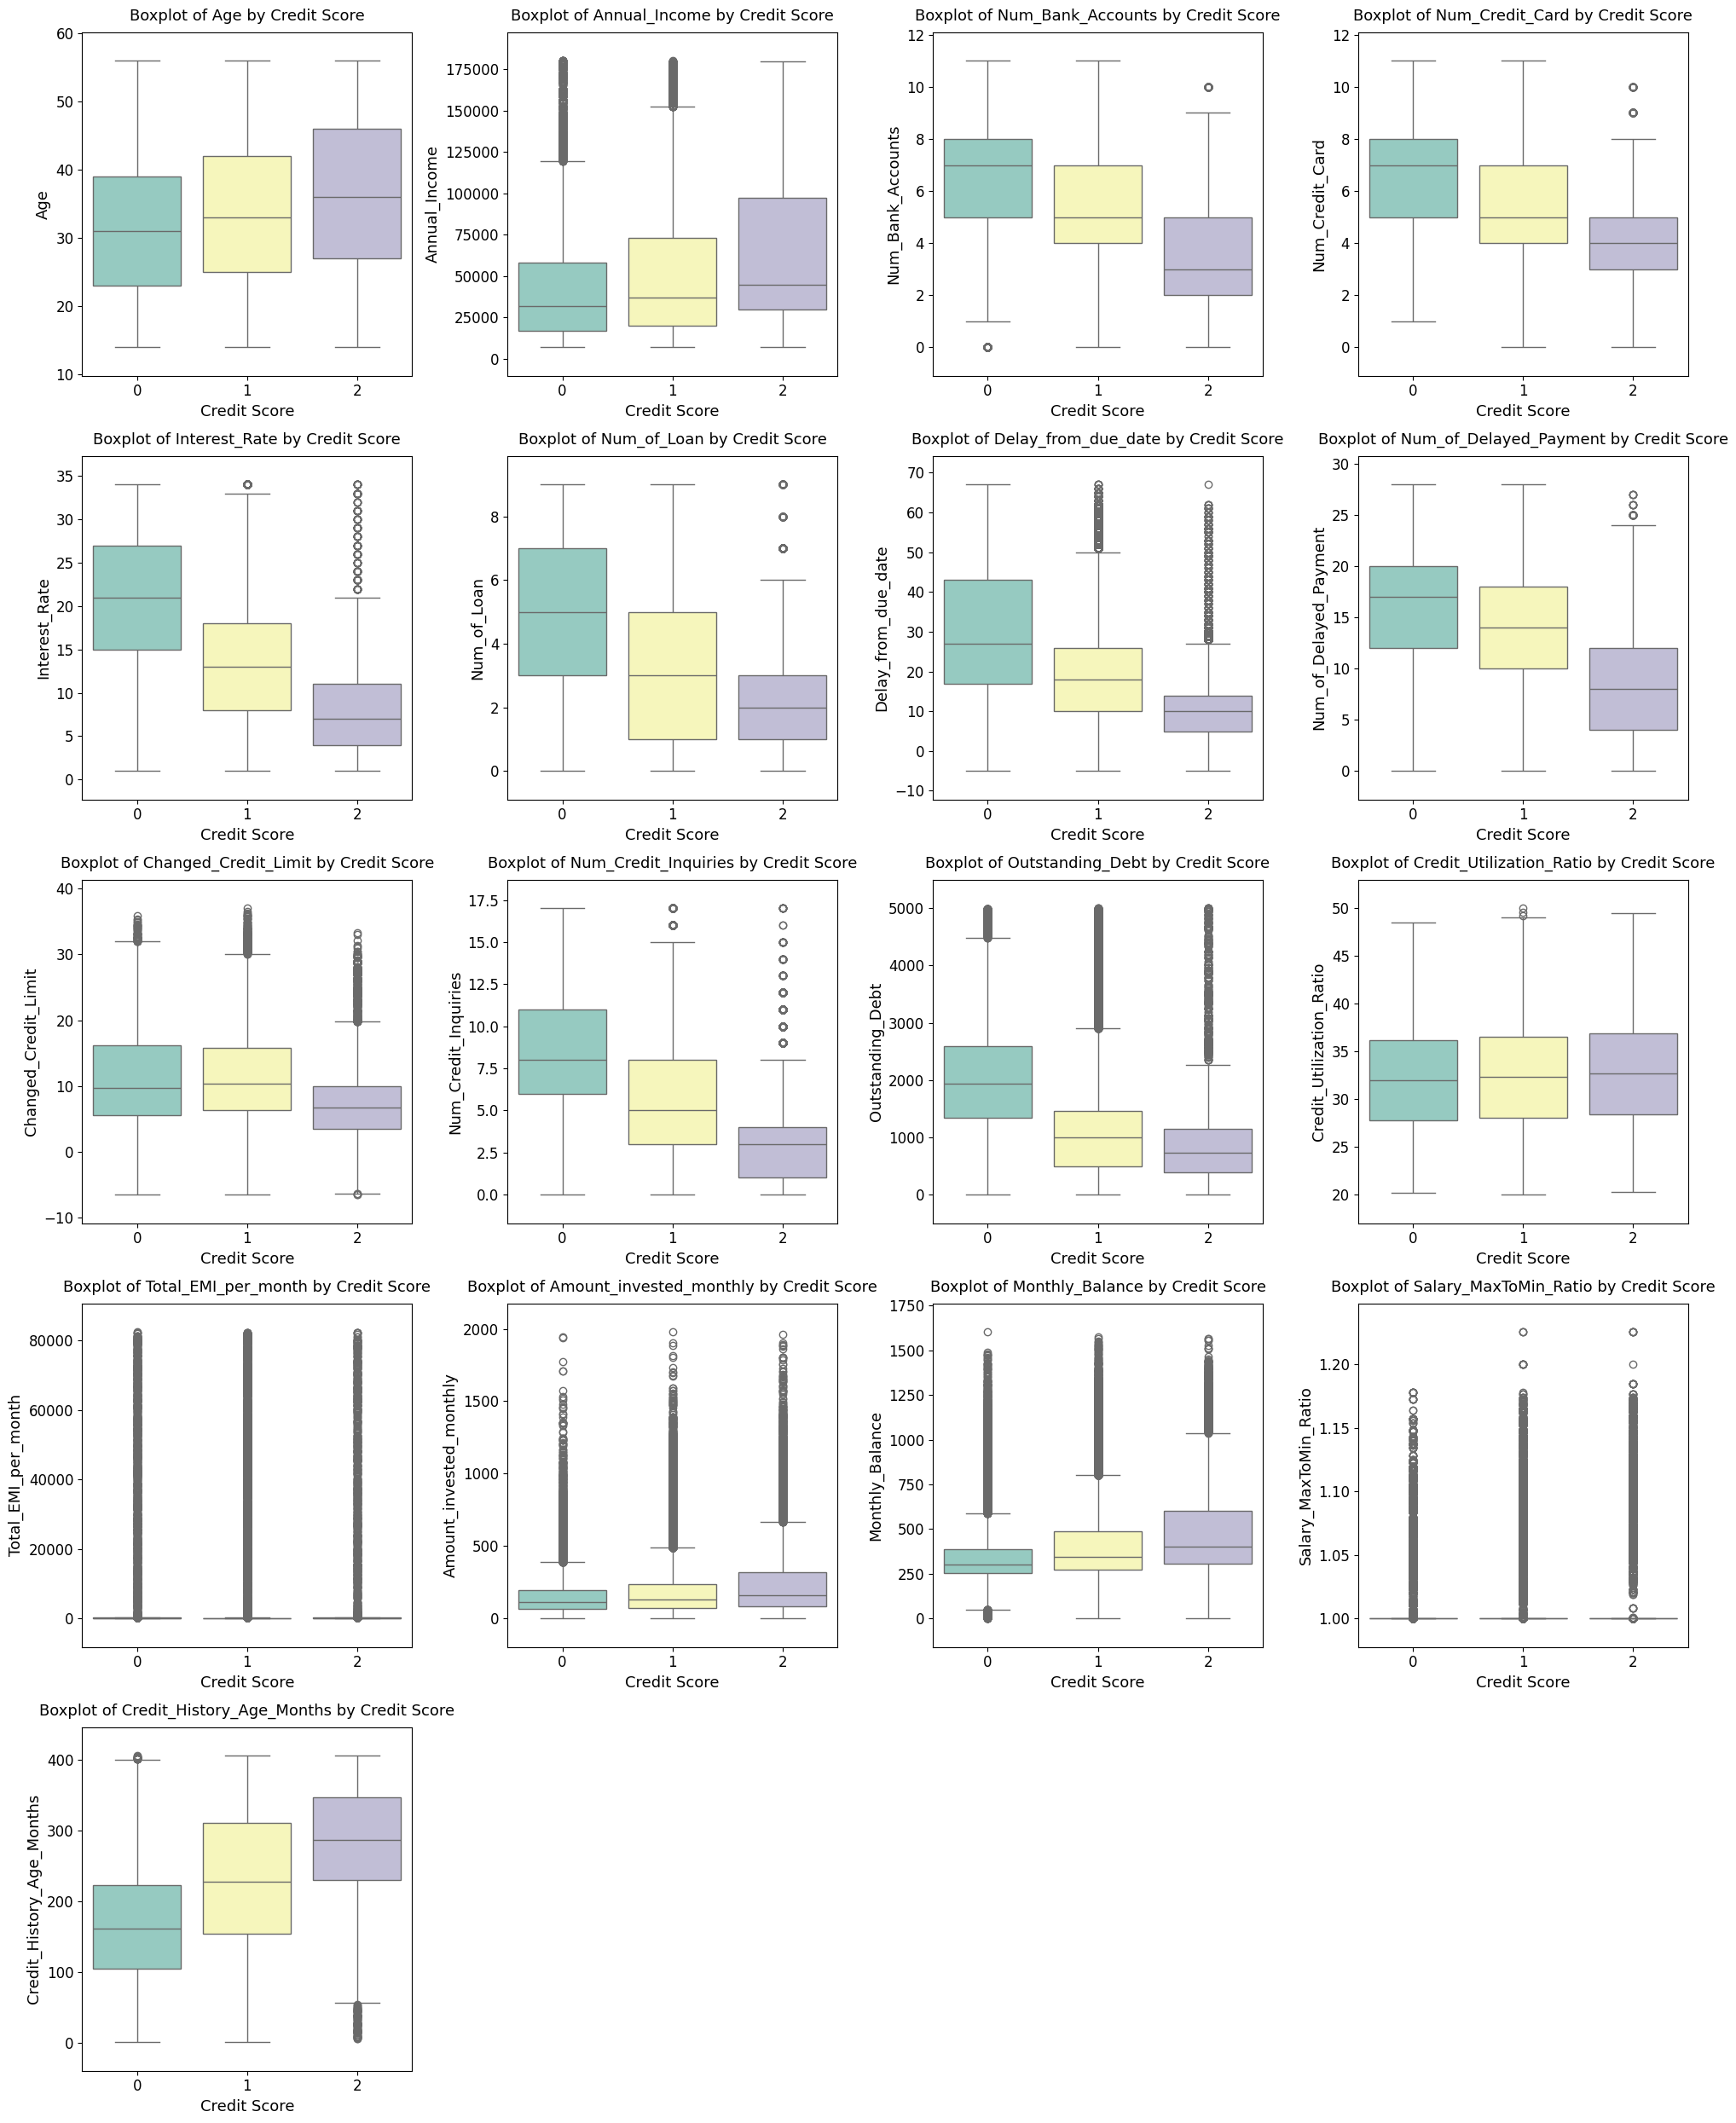

In [113]:
# Calculate number of rows and columns
num_cols = 4
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, num_rows * 5))

# Plotting
for i, col in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x='Credit_Score', y=col, data=df, palette='Set3')
    plt.title(f'Boxplot of {col} by Credit Score', fontsize=13, pad=10)
    plt.xlabel('Credit Score', fontsize=13)
    plt.ylabel(col, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Automatically adjust y-axis limits
    plt.ylim(df[col].min() - (df[col].max() - df[col].min()) * 0.1,
             df[col].max() + (df[col].max() - df[col].min()) * 0.1)

# Adjust horizontal (wspace) and vertical (hspace) spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.7)

plt.tight_layout()

In [114]:
def chi_2_test(df: pd.DataFrame, cat_cols: list, num_cols: list):

    y = df["Credit_Score"].values
    summary = np.empty((len(cat_cols) + len(num_cols), 3), dtype="object")

    def perform_test(cols, test):
        if test == "chi2":
            for i, col in enumerate(cols):
                cross = pd.crosstab(index=df[col], columns=[df["Credit_Score"]])
                t_stat, pvalue, *_ = chi2_contingency(cross)
                summary[i, :] = [col, t_stat, pvalue]

        elif test == "f_classif":
            for i, col in enumerate(cols, start=len(cat_cols)):
                t_stat, pvalue = f_classif(df[[col]], y.reshape(-1, 1))
                summary[i, :] = [col, t_stat[0], pvalue[0]]

    # Perform Chi-square test for categorical columns
    perform_test(cat_cols, test="chi2")

    # Perform F-test for numerical columns
    perform_test(num_cols, test="f_classif")

    # Return results as a DataFrame
    return pd.DataFrame(
        data=summary,
        columns=["column", 't-statistic', "p-value"]
    )

# Assuming cat_cols and num_cols are already defined
chi2_summary = chi_2_test(df, categorical_colmns, numeric_columns).sort_values(by="t-statistic", ascending=False)

In [115]:
chi2_summary.style.bar("t-statistic").background_gradient(
    "Blues", subset="t-statistic")

,column,t-statistic,p-value
0,Credit_Mix,40489.417662,0.000000
1,Payment_of_Min_Amount,22420.443703,0.000000
16,Interest_Rate,15420.276171,0.000000
21,Num_Credit_Inquiries,11918.589891,0.000000
18,Delay_from_due_date,11471.888723,0.000000
15,Num_Credit_Card,9778.637584,0.000000
14,Num_Bank_Accounts,9271.532793,0.000000
22,Outstanding_Debt,9115.496701,0.000000
19,Num_of_Delayed_Payment,8818.423566,0.000000
28,Credit_History_Age_Months,8599.388933,0.000000


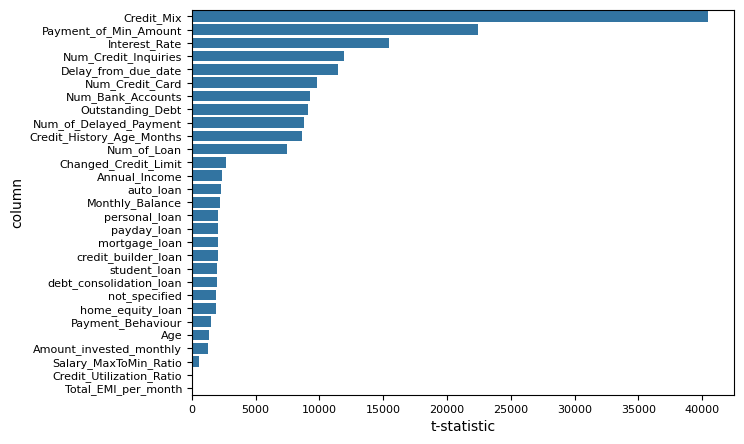

In [116]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=chi2_summary, y="column", x="t-statistic", ax=ax)
plt.setp([ax.get_xticklabels(), ax.get_yticklabels()], size=8)
fig.show()

In [117]:
insignificant_cols = ['Total_EMI_per_month', 'Credit_Utilization_Ratio', 'Salary_MaxToMin_Ratio', 'Amount_invested_monthly', 'Age', 'Payment_Behaviour']
df = df.drop(columns=insignificant_cols)

In [118]:
# Save the DataFrame 'df' to a CSV file named 'credit_score_train.csv'
df.to_csv("credit_score_train.csv", index=False)